## Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_results_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
3
# Display the data table for preview
combined_study_results_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = combined_study_results_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Optional: Get all the data for the duplicate mouse ID.


duplicate_mouse_ids = combined_study_results_df.loc[combined_study_results_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids



array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined_df =  combined_study_results_df[combined_study_results_df["Mouse ID"].isin(duplicate_mouse_ids)==False]

cleaned_combined_df






,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
## Checking the number of mice in the clean DataFrame
total_mice_cleaned = cleaned_combined_df["Mouse ID"].nunique()
total_mice_cleaned



248

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


mean_tumor_vol_drug_regimen = cleaned_combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_vol_drug_regimen = cleaned_combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
std_tumor_vol_drug_regimen = cleaned_combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
var_tumor_vol_drug_regimen = cleaned_combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
sem_tumor_vol_drug_regimen = cleaned_combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


summary_statistics_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol_drug_regimen, "Median Tumor Volume": median_tumor_vol_drug_regimen, " Tumor Volume Variance": var_tumor_vol_drug_regimen, 
                                     "Tumor Volume Std. Dev.": std_tumor_vol_drug_regimen, "Tumor Volume Std. Err.": sem_tumor_vol_drug_regimen})
summary_statistics_df.head(15)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


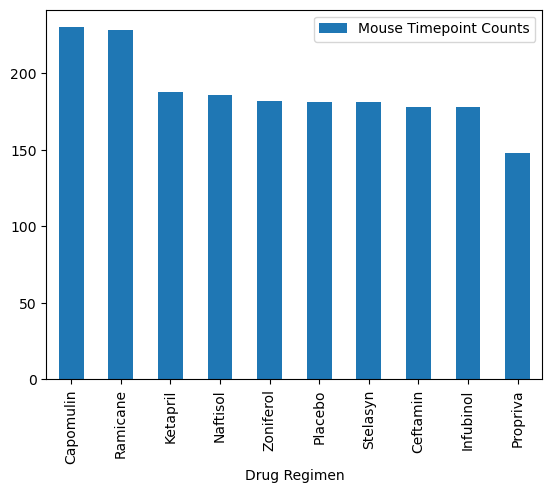

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_id_timepoint_counts = cleaned_combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()
drug_name = list(mouse_id_timepoint_counts.index)
mouse_id_timepoint_counts_df = pd.DataFrame({"Mouse Timepoint Counts": mouse_id_timepoint_counts, "Drug Regimen": drug_name})
sorted_mouse_id_timepoint_counts_df = mouse_id_timepoint_counts_df.sort_values(by="Mouse Timepoint Counts", ascending=False)
bar_chart = sorted_mouse_id_timepoint_counts_df.plot.bar(x= "Drug Regimen",y ="Mouse Timepoint Counts", rot=90)

## Bar and Pie Charts

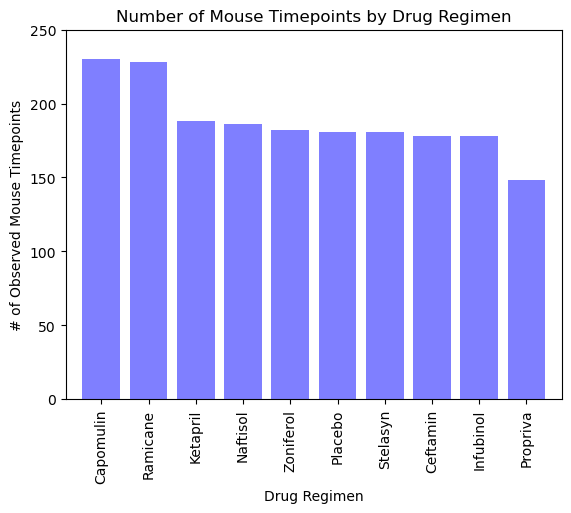

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#mouse_id_timepoint_counts = cleaned_combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()
mouse_id_timepoint_counts_df = pd.DataFrame({"Mouse Timepoint Counts": mouse_id_timepoint_counts} )
sorted_mouse_id_timepoint_counts_df = mouse_id_timepoint_counts_df.sort_values(by="Mouse Timepoint Counts", ascending=False)
drug_name = list(sorted_mouse_id_timepoint_counts_df.index)
x_axis = np.arange(len(mouse_id_timepoint_counts))
plt.bar(x_axis, sorted_mouse_id_timepoint_counts_df["Mouse Timepoint Counts"], color ='blue', alpha=0.5, align="center")
plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(0,max(mouse_id_timepoint_counts)+20)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_name, rotation = "vertical")
plt.title("Number of Mouse Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



C:\Users\didem\AppData\Local\Temp\ipykernel_28860\1880425927.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  mice_by_sex_df_pandas = pd.DataFrame({"Sex": ["Male","Female"], "Count": [int(number_male) , int(number_female)]})


<Axes: ylabel='count'>

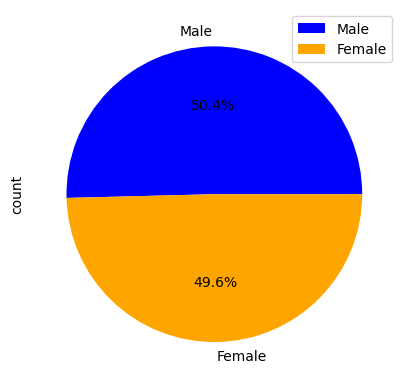

In [10]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

mice_by_sex = cleaned_combined_df.groupby(["Mouse ID"])["Sex"].unique()
mice_by_sex_df = pd.DataFrame({"Count": mice_by_sex})
number_male = mice_by_sex_df.loc[mice_by_sex_df["Count"] == "Male"].count()
number_male
number_female = total_mice_cleaned - number_male 
number_female

mice_by_sex_df_pandas = pd.DataFrame({"Sex": ["Male","Female"], "Count": [int(number_male) , int(number_female)]})
labels = ["Male", "Female"]

colors=["blue","orange"]
panda_pie = mice_by_sex_df_pandas.plot(kind="pie", y="Count", labels=labels, colors=colors, ylabel="count", autopct='%1.1f%%')
panda_pie




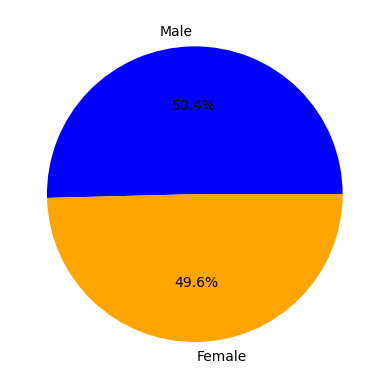

In [11]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
#mice_by_sex = cleaned_combined_df.groupby(["Mouse ID"])["Sex"].unique()
#mice_by_sex_df_py = pd.DataFrame({"Count": mice_by_sex})
#number_male = mice_by_sex_df.loc[mice_by_sex_df["Count"] == "Male"].count()
#number_male
#number_female = total_mice_cleaned - number_male 
#number_female

#Make the pie chart
labels = ["Male", "Female"]
count = cleaned_combined_df.groupby(["Mouse ID", "Sex"]).count().reset_index()[["Mouse ID","Sex"]]["Sex"].value_counts()
colors = ["blue","orange"]
plot_py = plt.pie(count,labels=labels, colors=colors, autopct="%1.1f%%")

plt.show()





## Quartiles, Outliers and Boxplots

In [12]:
cleaned_combined_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin:

treatment_filtered_max_time = cleaned_combined_df.groupby(["Mouse ID"])["Timepoint"].max()
treatment_filtered_max_time = treatment_filtered_max_time.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

renamed_merged = treatment_filtered_max_time.merge(cleaned_combined_df, on=['Mouse ID','Timepoint'], how="left")
renamed_merged.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [14]:
# Define treatment list
four_treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Initialize list for tumor volumes
tumor_volume = []

# Calculate IQR and identify potential outliers for each treatment
for drug in four_treatment:
    # Filter data for each drug
    final_tumor_vol = renamed_merged.loc[renamed_merged["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    # Append filtered data to list
    tumor_volume.append(final_tumor_vol)
    # Calculate quartiles and IQR
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lq = quartiles[0.25]
    uq = quartiles[0.75]
    iqr = uq - lq
    # Determine bounds for potential outliers
    lower_bound = lq - (1.5 * iqr)
    upper_bound = uq + (1.5 * iqr)
    # Identify outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}") 

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


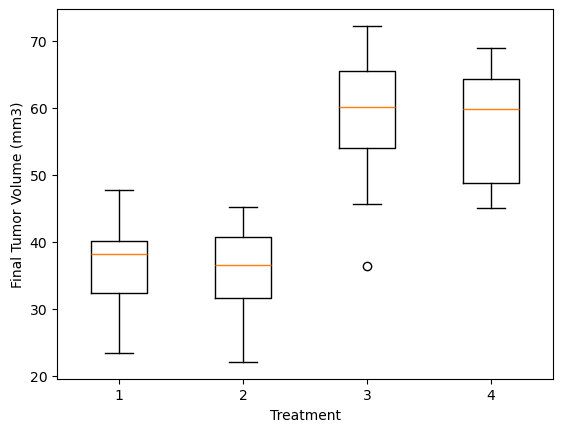

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Calculate IQR and identify potential outliers for each treatment
#treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

capomulin_vol =[]
ramicane_vol =[]
infubinol_vol = []
ceftamin_vol =[]

capomulin_vol = renamed_merged.loc[renamed_merged["Drug Regimen"] == "Capomulin", 'Tumor Volume (mm3)']
ramicane_vol = renamed_merged.loc[renamed_merged["Drug Regimen"] == "Ramicane", 'Tumor Volume (mm3)']
infubinol_vol = renamed_merged.loc[renamed_merged["Drug Regimen"] == "Infubinol", 'Tumor Volume (mm3)']
ceftamin_vol = renamed_merged.loc[renamed_merged["Drug Regimen"] == "Ceftamin", 'Tumor Volume (mm3)']


box_data = [capomulin_vol, ramicane_vol, infubinol_vol, ceftamin_vol]

# Multiple box plots on one Axes
fig,ax = plt.subplots()
labels_bp= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
boxplot = ax.boxplot(box_data)
ax.set_xlabel("Treatment")
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()
 



## Line and Scatter Plots

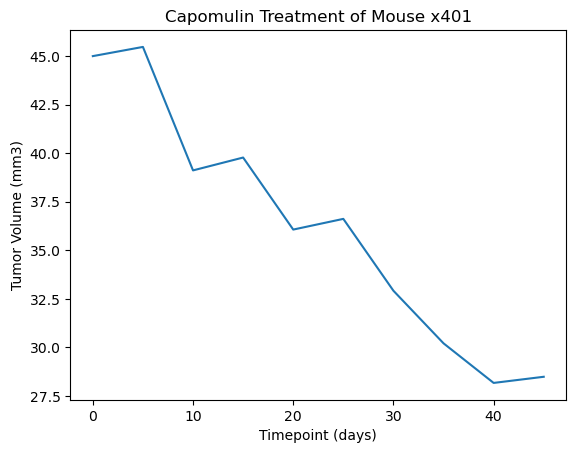

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#See all mice inthe Capomulin treatment group

capomulin_time_vol_df = cleaned_combined_df.loc[cleaned_combined_df["Drug Regimen"]=="Capomulin", ["Mouse ID","Tumor Volume (mm3)", "Timepoint"]]
x401_time_tumor_df = capomulin_time_vol_df.loc[capomulin_time_vol_df["Mouse ID"] == "x401",["Tumor Volume (mm3)", "Timepoint"]]

sorted_x401_df = x401_time_tumor_df.sort_values(by="Timepoint")
sorted_x401_df.head(50)

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse x401")
plt.plot(sorted_x401_df["Timepoint"],sorted_x401_df["Tumor Volume (mm3)"])
plt.show()


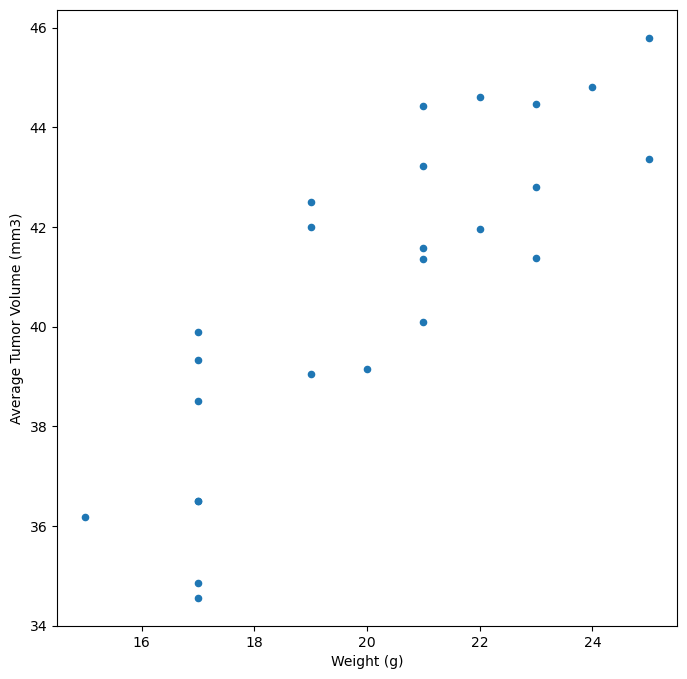

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_tumor_weight_df = cleaned_combined_df.loc[cleaned_combined_df["Drug Regimen"]=="Capomulin", ["Mouse ID","Tumor Volume (mm3)","Weight (g)"]]
capomulin_avgtumor_weight = capomulin_tumor_weight_df.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean()
capomulin_avgtumor_weight_df = pd.DataFrame(capomulin_avgtumor_weight)
renamed_capomulin_avgtumor_weight_df = capomulin_avgtumor_weight_df.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
new_scatter_df = renamed_capomulin_avgtumor_weight_df.reset_index()
new_scatter_df.plot(kind="scatter", x="Weight (g)", y= "Average Tumor Volume (mm3)", figsize=(8,8))
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


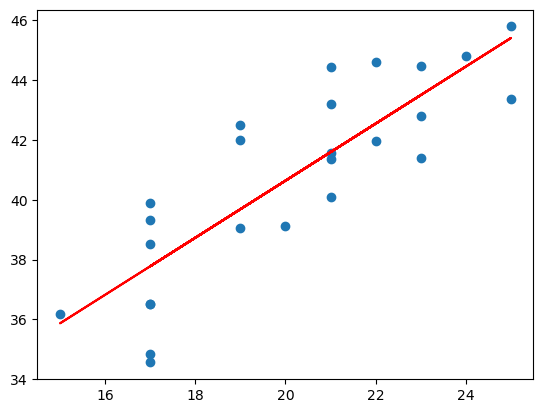

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_tumor_weight_df = cleaned_combined_df.loc[cleaned_combined_df["Drug Regimen"]=="Capomulin", ["Mouse ID","Tumor Volume (mm3)","Weight (g)"]]
capomulin_avgtumor_weight = capomulin_tumor_weight_df.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean()
capomulin_avgtumor_weight_df = pd.DataFrame(capomulin_avgtumor_weight)
renamed_capomulin_avgtumor_weight_df = capomulin_avgtumor_weight_df.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
new_scatter_df = renamed_capomulin_avgtumor_weight_df.reset_index()
plt.scatter(new_scatter_df["Weight (g)"],new_scatter_df["Average Tumor Volume (mm3)"])
weight = new_scatter_df.iloc[:,1]
volume = new_scatter_df.iloc[:,2]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")
# Linear regression model 
(slope,intercept,rvalue,pvalue,stderr) = linregress (weight,volume)
regression_val = weight * slope + intercept
line_of_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight, regression_val, "r-")
plt.annotate(line_of_equation,(5.2,0.8), fontsize=15, color="red")
plt.show()


